<a href="https://colab.research.google.com/github/hiroto-noguchi/weekly_articles_2023/blob/main/weekly_article_2023_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
import time
from collections import Counter

text = ''
base = 'https://en.wikipedia.org/wiki/'
items = ['Web_scraping', 'Robots.txt', 'Natural_language_processing']

for item in items:
  webpage = requests.get(base+item)
  soup = BeautifulSoup(webpage.content, 'html.parser')
  p_tags = soup.find_all('p')
  for p_tag in p_tags:
    text = text + p_tag.get_text().replace('\n', ' ')
  time.sleep(1)
text.lower().split()
freq = Counter(text.lower().split())
freq

Counter({'web': 68,
         'scraping,': 4,
         'harvesting,': 2,
         'or': 38,
         'data': 27,
         'extraction': 2,
         'is': 64,
         'scraping': 23,
         'used': 17,
         'for': 55,
         'extracting': 3,
         'from': 32,
         'websites.[1]': 1,
         'software': 9,
         'may': 11,
         'directly': 2,
         'access': 9,
         'the': 303,
         'world': 3,
         'wide': 3,
         'using': 12,
         'hypertext': 1,
         'transfer': 1,
         'protocol': 5,
         'a': 135,
         'browser.': 1,
         'while': 5,
         'can': 32,
         'be': 40,
         'done': 1,
         'manually': 3,
         'by': 32,
         'user,': 1,
         'term': 2,
         'typically': 4,
         'refers': 2,
         'to': 136,
         'automated': 3,
         'processes': 1,
         'implemented': 1,
         'bot': 1,
         'crawler.': 2,
         'it': 25,
         'form': 4,
         'of': 173,
  

In [2]:
#Google Driveをマウントする。
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Pandasをインポートする。
import pandas as pd
#辞書データをdataframeに変換する。
df = pd.DataFrame.from_dict(freq, orient='index',columns=['frequency']).rename_axis('word')
df

,frequency
word,
web,68
"scraping,",4
"harvesting,",2
or,38
data,27
...,...
inherent,1
multimodal,1
(although,1


In [4]:
#20回以上繰り返される語のみを抽出する。
df[df['frequency'] >= 20]

,frequency
word,
web,68
or,38
data,27
is,64
scraping,23
for,55
from,32
the,303
a,135


In [5]:
#dataframeをcsvファイルでGoogle Driveに保存する。
df.to_csv('/content/drive/MyDrive/frequency.csv')

In [6]:
#Google Driveのcsvファイルをdataframeとして読み込む。
df_1 = pd.read_csv('/content/drive/MyDrive/frequency.csv')
df_1

,word,frequency
0,web,68
1,"scraping,",4
2,"harvesting,",2
3,or,38
4,data,27
...,...,...
1847,inherent,1
1848,multimodal,1
1849,(although,1
1850,rarely,1


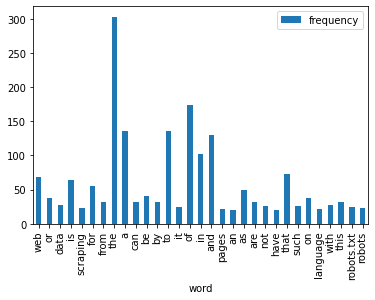

In [7]:
#20回以上繰り返される語のみを抽出し、棒グラフにする。
df[df['frequency'] >= 20].plot(kind='bar')

In [8]:
#20回以上繰り返される語のみを抽出し、降順に並べる。
df[df['frequency'] >= 20].sort_values('frequency', ascending=False)

,frequency
word,
the,303
of,173
to,136
a,135
and,130
in,102
that,72
web,68
is,64


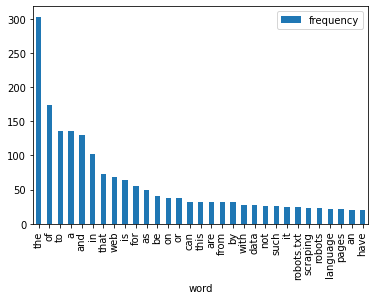

In [9]:
#20回以上繰り返される語のみを抽出し、降順に並べて、棒グラフにする。
df[df['frequency'] >= 20].sort_values('frequency', ascending=False).plot(kind='bar')

In [10]:
print(3*1**2+2*1+1) 
print(3*2**2+2*2+1) 
print(3*3**2+2*3+1) 

6
17
34


In [11]:
#関数化する。
def f(x):
  return 3*x**2+2*x+1

In [12]:
#関数に1から3までの値を代入する。
print(f(1))
print(f(2))
print(f(3))

6
17
34


In [13]:
#関数に1から10までの値を代入する。
for i in range(10):
  print(f(i))

1
6
17
34
57
86
121
162
209
262


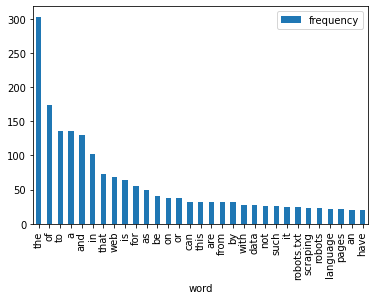

In [14]:
#関数化する前の状態を書き出している。
import requests
from bs4 import BeautifulSoup
import time
from collections import Counter
import pandas as pd

text = ''
base = 'https://en.wikipedia.org/wiki/'
items = ['Web_scraping', 'Robots.txt', 'Natural_language_processing']
n = 20

for item in items:
  webpage = requests.get(base+item)
  soup = BeautifulSoup(webpage.content, 'html.parser')
  p_tags = soup.find_all('p')
  for p_tag in p_tags:
    text = text + p_tag.get_text().replace('\n', ' ')
  time.sleep(1)
text.lower().split()
freq = Counter(text.lower().split())

df = pd.DataFrame.from_dict(freq, orient='index',columns=['frequency']).rename_axis('word')
df[df['frequency'] >= n].sort_values('frequency', ascending=False).plot(kind='bar')

In [15]:
#スクレイピングから可視化までの流れを関数として定義する。
#itemにはリストでURLの末尾を、nには整数で単語の出現回数の閾値を受け取る。
def visualize(items, n):
  import requests
  from bs4 import BeautifulSoup
  import time
  from collections import Counter
  import pandas as pd

  text = ''
  base = 'https://en.wikipedia.org/wiki/'

  for item in items:
    webpage = requests.get(base+item)
    soup = BeautifulSoup(webpage.content, 'html.parser')
    p_tags = soup.find_all('p')
    for p_tag in p_tags:
      text = text + p_tag.get_text().replace('\n', ' ')
    time.sleep(1)
  text.lower().split()
  freq = Counter(text.lower().split())

  df = pd.DataFrame.from_dict(freq, orient='index',columns=['frequency']).rename_axis('word')
  df[df['frequency'] >= n].sort_values('frequency', ascending=False).plot(kind='bar')

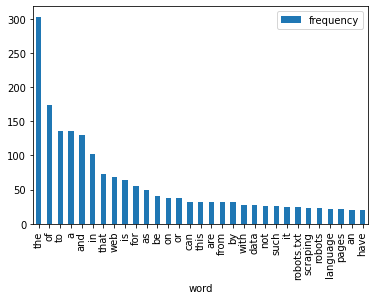

In [16]:
#'Web_scraping', 'Robots.txt', 'Natural_language_processing'の記事で20回以上出てくる単語を棒グラフで可視化している。
visualize(['Web_scraping', 'Robots.txt', 'Natural_language_processing'], 20)

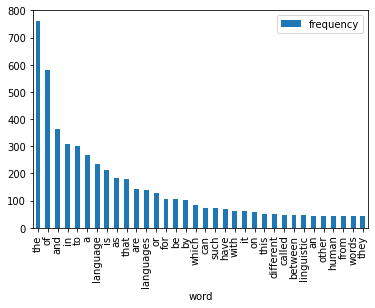

In [17]:
#'Language', 'English'の記事で40回以上出てくる単語を棒グラフで可視化している。
visualize(['Language', 'English'], 40)